In [102]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sm
import scipy as sp
import copy as c
plt.style.use('bmh')

In [103]:
C, E, V1, x, x1, x2 = sm.symbols("C E V1 x x1 x2", real=True,positive=True)
kArray = [sm.sqrt(C * E), sm.sqrt(C * (E - V1)), sm.sqrt(C * E)]

In [104]:
def createMatrix(k):
    return sm.Matrix([
        [sm.exp(sm.I * k * x), sm.exp(-sm.I * k * x)],
        [sm.I * k * sm.exp(sm.I * k * x), -sm.I * k * sm.exp(-sm.I * k * x)]
    ])


In [105]:
MArray = [createMatrix(k) for k in kArray]
MArray[1]

Matrix([
[                       exp(I*sqrt(C)*x*sqrt(E - V1)),                         exp(-I*sqrt(C)*x*sqrt(E - V1))],
[I*sqrt(C)*sqrt(E - V1)*exp(I*sqrt(C)*x*sqrt(E - V1)), -I*sqrt(C)*sqrt(E - V1)*exp(-I*sqrt(C)*x*sqrt(E - V1))]])

In [106]:
#Now to find the propagation matrix
M1_x1 = c.deepcopy(MArray[1]).subs({x: x1})
M1_x2_inv = c.deepcopy(MArray[1]).subs({x: x2}).inv()

P = sm.simplify(M1_x1 * M1_x2_inv, complex=True)

P

Matrix([
[                       (exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*exp(-I*sqrt(C)*sqrt(E - V1)*(x1 + x2))/2, I*(-exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*exp(-I*sqrt(C)*sqrt(E - V1)*(x1 + x2))/(2*sqrt(C)*sqrt(E - V1))],
[I*sqrt(C)*sqrt(E - V1)*(exp(2*I*sqrt(C)*x1*sqrt(E - V1)) - exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*exp(-I*sqrt(C)*sqrt(E - V1)*(x1 + x2))/2,                           (exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*exp(-I*sqrt(C)*sqrt(E - V1)*(x1 + x2))/2]])

In [107]:
#Lets make the substitution E -> V1
Peq = c.deepcopy(P).applyfunc(lambda elem: sm.limit(elem, V1, E))
Peq

Matrix([
[1, (2*sqrt(C)*x1 - 2*sqrt(C)*x2)/(2*sqrt(C))],
[0,                                         1]])

In [108]:
#Our result nicely agrees with theory
#Also inside the potential we get the simpler equation
#d^2/dx^2 psi = 0 , that has an obvious solution
#A1 + A2*x

In [109]:
#Ex 2.
M0_inv_x1 = MArray[0].subs(x, x1).inv()
M2_x2 = MArray[2].subs(x, x2)
t = sm.simplify(M0_inv_x1 * P * M2_x2, complex=True)

t

Matrix([
[(2*sqrt(E)*sqrt(E - V1)*exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + 2*sqrt(E)*sqrt(E - V1)*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) + 2*E*exp(2*I*sqrt(C)*x1*sqrt(E - V1)) - 2*E*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) - V1*exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + V1*exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*exp(I*sqrt(C)*(-sqrt(E)*x1 + sqrt(E)*x2 - x1*sqrt(E - V1) - x2*sqrt(E - V1)))/(4*sqrt(E)*sqrt(E - V1)),                                                                                                                                                                                                    V1*(-exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*exp(-I*sqrt(C)*(sqrt(E)*x1 + sqrt(E)*x2 + x1*sqrt(E - V1) + x2*sqrt(E - V1)))/(4*sqrt(E)*sqrt(E - V1))],
[                                                                                                                                                                                                      V1*(exp(2*I*sqrt(C)*x1*sqrt(E - V1)) - exp(

In [110]:
#The transmition coeeficient is going to be:
t11 = t.row(1)[1]
T = (1 / (t11 * sm.conjugate(t11))).simplify()
T

16*E*sqrt(E - V1)*exp(I*sqrt(C)*(x1*sqrt(E - V1) + x1*conjugate(sqrt(E - V1)) + x2*sqrt(E - V1) + x2*conjugate(sqrt(E - V1))))/(((2*sqrt(E)*conjugate(sqrt(E - V1)) - 2*E + V1)*exp(2*I*sqrt(C)*x2*conjugate(sqrt(E - V1))) + (2*sqrt(E)*conjugate(sqrt(E - V1)) + 2*E - V1)*exp(2*I*sqrt(C)*x1*conjugate(sqrt(E - V1))))*(2*sqrt(E)*sqrt(E - V1)*exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + 2*sqrt(E)*sqrt(E - V1)*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) - 2*E*exp(2*I*sqrt(C)*x1*sqrt(E - V1)) + 2*E*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) + V1*exp(2*I*sqrt(C)*x1*sqrt(E - V1)) - V1*exp(2*I*sqrt(C)*x2*sqrt(E - V1)))*conjugate(1/sqrt(E - V1)))

In [111]:
Ttrig = sm.trigsimp(c.deepcopy(T).subs({x1:0}))
Ttrig

16*E*sqrt(E - V1)*exp(I*sqrt(C)*(x2*sqrt(E - V1) + x2*conjugate(sqrt(E - V1))))/((2*sqrt(E)*conjugate(sqrt(E - V1)) + 2*E - V1 + (2*sqrt(E)*conjugate(sqrt(E - V1)) - 2*E + V1)*exp(2*I*sqrt(C)*x2*conjugate(sqrt(E - V1))))*(2*sqrt(E)*sqrt(E - V1)*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) + 2*sqrt(E)*sqrt(E - V1) + 2*E*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) - 2*E - V1*exp(2*I*sqrt(C)*x2*sqrt(E - V1)) + V1)*conjugate(1/sqrt(E - V1)))

In [115]:
firstCase = sm.simplify(c.deepcopy(Ttrig).subs({V1 : 50, C : 0.1, x2:10 }))
secondCase = sm.simplify(c.deepcopy(Ttrig).subs({V1 : 50, C : 0.1, x2:3 }))
firstCaseCopy = c.deepcopy(firstCase)
secondCaseCopy = c.deepcopy(secondCase)
energyValues = np.linspace(15,100,500)
TValuesFirstCase = np.array([sm.re(firstCaseCopy.subs({E:element}).evalf()) for element in energyValues])
RValuesFirstCase = np.array([1-element for element in TValuesFirstCase])
TValuesSecondCase = np.array([sm.re(secondCaseCopy.subs({E:element}).evalf()) for element in energyValues])
RValuesSecondCase = np.array([1-element for element in TValuesSecondCase])
#I only keep the real parts of the solutions as sympy makes arithemtics errors and gives an 
#imaginary component of order(-86) which should not happen

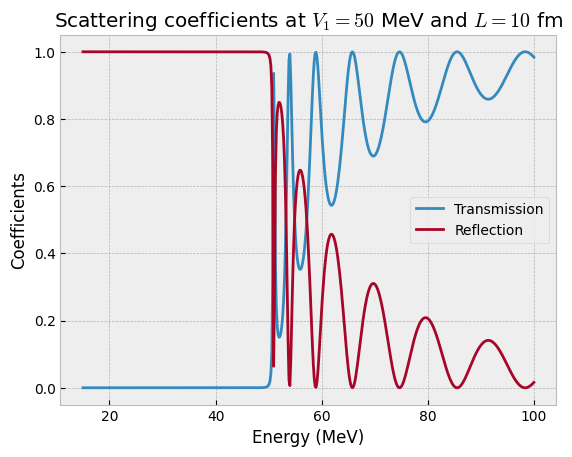

In [118]:
plt.plot(energyValues,TValuesFirstCase,label='Transmission')
plt.plot(energyValues,RValuesFirstCase,label='Reflection')
plt.title(r'Scattering coefficients at $V_1 = 50$ MeV and $L = 10$ fm')
plt.xlabel('Energy (MeV)')
plt.ylabel('Coefficients')
plt.legend()
plt.show()
#We observe that the coefficients switch from one extreme value to the other, after the scattering
#energy and do so with make resonances. Because we have a large gap, many harmonics creep into the phenomenon
#and we get that oscillatory transition

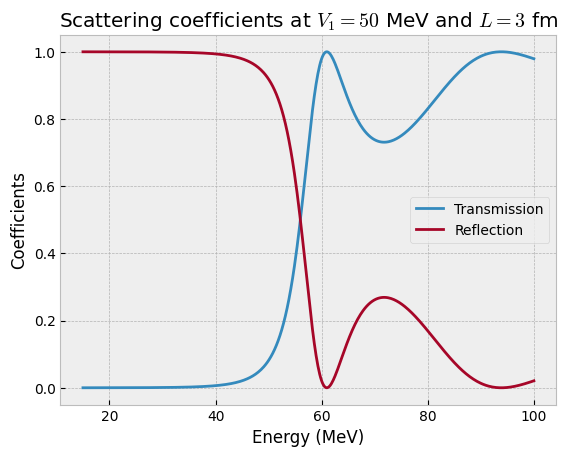

In [117]:
plt.plot(energyValues,TValuesSecondCase,label='Transmission')
plt.plot(energyValues,RValuesSecondCase,label='Reflection')
plt.title(r'Scattering coefficients at $V_1 = 50$ MeV and $L = 3$ fm')
plt.xlabel('Energy (MeV)')
plt.ylabel('Coefficients')
plt.legend()
plt.show()
#Here as the gap is much narrower the transition is smoother.